In [1]:
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
# import matplotlib as mpl
# mpl.rcParams['text.usetex']=True
# mpl.rcParams['text.latex.unicode']=True

In [2]:
def qdef(n,q):
    return (q**(n/2)-q**(-n/2))/(q**(1/2)-q**(-1/2))
    
def nfacq(n,q):
    y=1
    for i in range(1,int(n)+1):
        y*= qdef(i,q)
    return y

def delta(j1,j2,j3,q):
    return (nfacq(-j1+j2+j3,q)*nfacq(j1-j2+j3,q)*nfacq(j1+j2-j3,q)/nfacq(j1+j2+j3+1,q))**0.5

def sixj(j1,j2,j12,j3,j,j23,q):
    fac=delta(j1,j2,j12,q)*delta(j12,j3,j,q)*delta(j2,j3,j23,q)*delta(j1,j23,j,q)
    a1=j1+j2+j12
    a2=j+j3+j12
    a3=j1+j+j23
    a4=j2+j3+j23
    b1=j1+j2+j+j3
    b2=j1+j3+j12+j23
    b3=j2+j+j12+j23
    
    zmin=np.max([a1,a2,a3,a4])
    zmax=np.min([b1,b2,b3])
#     print(zmin,zmax)
    
    w=0
    for z in np.arange(np.ceil(zmin),int(zmax)+1):
        den= nfacq(z-j1-j2-j12,q)*nfacq(z-j12-j3-j,q)*nfacq(z-j2-j3-j23,q)\
            *nfacq(z-j1-j23-j,q)*nfacq(j1+j2+j3+j-z,q)*nfacq(j1+j12+j3+j23-z,q)\
            *nfacq(j2+j12+j+j23-z,q)
        w += (-1)**z* nfacq(z+1,q)/den
    return w*fac

def Fsym(j1,j2,j3,j,j12,j23,q):
    return (-1)**(j1+j2+j3+j)* (qdef(2*j12+1,q)*qdef(2*j23+1,q))**0.5 *sixj(j1,j2,j12,j3,j,j23,q)
    
def Rsym(j1,j2,j,q):
    return (-1)**np.abs(j-j1-j2) * q**((j*(j+1)-j1*(j1+1)-j2*(j2+1))/2)

def qdim(j,k):
    return np.sin((2*j+1)*pi/(k+2))/np.sin(pi/(k+2))

def Nabc(a,b,k):
    # takes two anyons and gives fusion channels
    cmin=np.abs(a-b)
    cmax=np.min([a+b, k-a-b])
    return np.arange(cmin,cmax+1)

def fusion(a,b,c,d,e,f,k):
    elist= Nabc(a,b,k)
    if e in elist:
        dlist= Nabc(e,c,k)
        if d in dlist:
            flist= Nabc(b,c,k)
            if f in flist:
                return True
    return False


In [ ]:
k=5
q= np.exp(1j*2*pi/(k+2))
d1=qdim(1,k)
d2=qdim(2,k)

p0= 1/d2

R11_2=Rsym(1,1,2,q)
R21_2=Rsym(2,1,2,q)
R12_1=Rsym(1,2,1,q)
R22_1=Rsym(2,2,1,q)

F111_1_22=Fsym(1,1,1,1,2,2,q)
F121_1_22=Fsym(1,2,1,1,2,2,q)
F111_2_22=Fsym(1,1,1,2,2,2,q)
F121_2_22=Fsym(1,2,1,2,2,2,q)

F212_1_11=Fsym(2,1,2,1,1,1,q)
F222_1_11=Fsym(2,2,2,1,1,1,q)
F212_2_11=Fsym(2,1,2,2,1,1,q)
F222_2_11=Fsym(2,2,2,2,1,1,q)

plist=np.linspace(0,1,100)
# plist=[p0]
rT1=np.zeros(len(plist))
rT2=np.zeros(len(plist))

for i_p in range(len(plist)):
    p1=plist[i_p]
    p2=1-p1
    rT1[i_p]= d1/d2*np.abs( p1*R11_2*F111_1_22+p2*R21_2*F121_1_22)\
    + np.abs( p1*R11_2*F111_2_22+p2*R21_2*F121_2_22)
    
    rT2[i_p]= np.abs( p1*R12_1*F212_1_11+p2*R22_1*F222_1_11)\
    + d2/d1*np.abs( p1*R12_1*F212_2_11+p2*R22_1*F222_2_11)

In [ ]:
fsize=10
plt.figure(figsize=(4,3))
ax1=plt.subplot()

ax1= plt.subplot()
plt.plot(plist,np.log(rT1),'-',markersize=2,label=r'$T_A$')
plt.plot(plist[0::2],np.log(rT2[0::2]),'o',markersize=2,label=r'$T_B$')
plt.xlabel('$p_{12}^1$',fontsize=fsize+2)
plt.ylabel(r'${\cal E}$',fontsize=fsize+2)
plt.xticks(np.arange(0,1.1,0.5),fontsize=fsize)
plt.yticks(fontsize=fsize)
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.legend(fontsize=fsize-1)
plt.tight_layout()

plt.savefig('rT1_rT2_su2_5.pdf')
plt.show()

In [ ]:
k=3
q= np.exp(1j*2*pi/(k+2))

a=1
b=1
da=qdim(a,k)
db=qdim(b,k)

fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
print(flist)

clist=[0,1,2]

plist=np.linspace(0,1,100)
# plist=[0]
rT1=np.zeros(len(plist))

for i_p in range(len(plist)):
    pf=[plist[i_p],1-plist[i_p]]
    for c in clist:
        sf=0
        for i_f in range(len(flist)):
            f= flist[i_f]
            if fusion(a,f,a,c,b,b,k):
                sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
                
        rT1[i_p] += qdim(c,k)/db* np.abs(sf)


In [ ]:
# analytical results for Ising and Fibonacci anyons

p= np.linspace(0,1)
if k==2:
    # Ising
    en= np.log(p**2+(1-p)**2)/2 + np.log(2)/2
if k==3:
    # Fibonacci
    phi = (1+np.sqrt(5))/2
    Rtt=np.exp(1j*3*pi/5)
    en= np.log( np.abs(p+(1-p)*Rtt)+ np.abs(p*phi- (1-p)*Rtt) ) -np.log(phi)

In [ ]:
plt.figure()
# plt.plot(plist,np.log(rT1)/np.log(da),'-')
plt.plot(plist,np.log(rT1),'-')

plt.plot(p,en,'o',label='Analytical') # sanity check

plt.legend()
plt.show()

k=  2 [0. 1.]
k=  3 [0 1]
k=  5 [0 1]


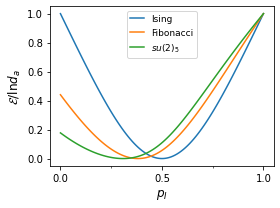

In [90]:
# su(2)k a=b comparison

klist=range(2,5)

fsize=10
plt.figure(figsize=(4,3))
ax1=plt.subplot()

# for k in [2,3,5,11,21,99]:
for k in [2,3,5]:
    if k==2:
        a=0.5
        b=0.5
    elif k==3:
        a=1
        b=1
    elif k==5:
        a=2
        b=2
    else:
        a=(k-1)/2
        b=a
        
    da=qdim(a,k)
    db=qdim(b,k)
    q= np.exp(1j*2*pi/(k+2))


    fmin=np.abs(a-b)
    fmax=np.min([a+b, k-a-b])
    flist=np.arange(fmin,fmax+1)
    print('k= ',k,flist)

    clist=range(0,int(k/2)+1)

    plist=np.linspace(0,1,100)
    rT1=np.zeros(len(plist))
    mI=np.zeros(len(plist))

    for i_p in range(len(plist)):
        pf=[plist[i_p],1-plist[i_p]]
        for c in clist:
            sf=0
            for i_f in range(len(flist)):
                f= flist[i_f]
                if fusion(a,f,a,c,b,b,k):
                    sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)

            rT1[i_p] += qdim(c,k)/db* np.abs(sf)
        for i1 in range(len(flist)):
            mI[i_p] -= pf[i1]*np.log(qdim(flist[i1],k)) 
        if min(plist[i_p],1-plist[i_p])<1e-5:
            mI[i_p] += np.log(da)+np.log(db)
        else:
            mI[i_p] += np.sum(pf*np.log(pf))+ np.log(da)+np.log(db)
        
    if k==2:
        plt.plot(plist,np.log(rT1)/np.log(da),'-',label='Ising')
#         plt.plot(plist,(mI)/np.log(da),'--',label='Ising')
    elif k==3:
        plt.plot(plist,np.log(rT1)/np.log(da),'-',label='Fibonacci')
#         plt.plot(plist,(mI)/np.log(da),'--',label='Fibonacci')
    else:
        plt.plot(plist,np.log(rT1)/np.log(da),'-',label=r'$su(2)_{%d}$' % (k))
#         plt.plot(plist,(mI)/np.log(da),'--',label=r'$su(2)_{%d}$' % (k))


plt.xlabel('$p_I$',fontsize=fsize+2)
plt.ylabel(r'${\cal E}/\ln d_a$',fontsize=fsize+2)
plt.xticks(np.arange(0,1.1,0.5),fontsize=fsize)
plt.yticks(fontsize=fsize)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.legend(fontsize=fsize-1,handlelength=1.5)
plt.tight_layout()

# plt.savefig('su2k_comparison.pdf')
plt.show()

k=  2 [0. 1.]
k=  3 [0 1]
k=  5 [0 1]


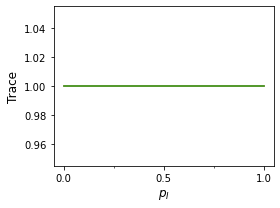

In [97]:
# checking trace
# su(2)k a=b comparison

klist=range(2,5)

fsize=10
plt.figure(figsize=(4,3))
ax1=plt.subplot()

# for k in [2,3,5,11,21,99]:
for k in [2,3,5]:
    if k==2:
        a=0.5
        b=0.5
    elif k==3:
        a=1
        b=1
    elif k==5:
        a=2
        b=2
    else:
        a=(k-1)/2
        b=a
        
    da=qdim(a,k)
    db=qdim(b,k)
    q= np.exp(1j*2*pi/(k+2))


    fmin=np.abs(a-b)
    fmax=np.min([a+b, k-a-b])
    flist=np.arange(fmin,fmax+1)
    print('k= ',k,flist)

    clist=range(0,int(k/2)+1)

    plist=np.linspace(0,1,100)
    rT1=np.zeros(len(plist), dtype=np.complex256)

    for i_p in range(len(plist)):
        pf=[plist[i_p],1-plist[i_p]]
        for c in clist:
            sf=0
            for i_f in range(len(flist)):
                f= flist[i_f]
                if fusion(a,f,a,c,b,b,k):
                    sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)*np.conj(Rsym(a,b,c,q))

            rT1[i_p] += qdim(c,k)/db* sf
        
    plt.plot(plist,np.abs(rT1))


plt.xlabel('$p_I$',fontsize=fsize+2)
plt.ylabel('Trace',fontsize=fsize+2)
plt.xticks(np.arange(0,1.1,0.5),fontsize=fsize)
plt.yticks(fontsize=fsize)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# plt.legend(fontsize=fsize-1,handlelength=1.5)
plt.tight_layout()

# plt.savefig('su2k_comparison.pdf')
plt.show()

k=  2 [0. 1.]
k=  3 [0. 1.]
k=  4 [0. 1.]
k=  10 [0. 1.]
k=  100 [0. 1.]


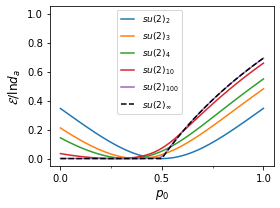

In [3]:
# su(2)k spin-1/2 comparison

plist=np.linspace(0.001,1,100)
# klist=range(2,5)

fsize=10
plt.figure(figsize=(4,3))
ax1=plt.subplot()

for k in [2,3,4,10,100]:        
# for k in np.arange(10,100,10):        
    a=0.5
    b=0.5

    da=qdim(a,k)
    db=qdim(b,k)
    q= np.exp(1j*2*pi/(k+2))


    fmin=np.abs(a-b)
    fmax=np.min([a+b, k-a-b])
    flist=np.arange(fmin,fmax+1)
    print('k= ',k,flist)

    clist=range(0,int(k/2)+1)

#     plist=np.linspace(0,1,100)
    rT1=np.zeros(len(plist))
    mI=np.zeros(len(plist))

    for i_p in range(len(plist)):
        pf=[plist[i_p],1-plist[i_p]]
        for c in clist:
            sf=0
            for i_f in range(len(flist)):
                f= flist[i_f]
                if fusion(a,f,a,c,b,b,k):
                    sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)

            rT1[i_p] += qdim(c,k)/db* np.abs(sf)
        for i1 in range(len(flist)):
            mI[i_p] -= pf[i1]*np.log(qdim(flist[i1],k)) 
        if min(plist[i_p],1-plist[i_p])<1e-5:
            mI[i_p] += np.log(da)+np.log(db)
        else:
            mI[i_p] += np.sum(pf*np.log(pf))+ np.log(da)+np.log(db)

#     plt.plot(plist,np.log(rT1)/np.log(da),'-',label=r'$su(2)_{%d}$' % (k))
    plt.plot(plist,np.log(rT1),'-',label=r'$su(2)_{%d}$' % (k))
#     plt.plot(plist,mI/np.log(da),'--',label=r'$su(2)_{%d}$' % (k))


neg= 1/2+plist+np.abs(plist-1/2)
# plt.plot(plist,np.log(neg)/np.log(2),'k--',label=r'$su(2)_{\infty}$')
plt.plot(plist,np.log(neg),'k--',label=r'$su(2)_{\infty}$')

plt.xlabel(r'$p_0$',fontsize=fsize+2)
plt.ylabel(r'${\cal E}/\ln d_a$',fontsize=fsize+2)
plt.xticks(np.arange(0,1.1,0.5),fontsize=fsize)
plt.ylim(-0.05,1.05)
plt.yticks(fontsize=fsize)
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.legend(fontsize=fsize-1,handlelength=1.5,bbox_to_anchor=(0.3, .98), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# plt.savefig('su2k_spin_half.pdf')
plt.show()

In [ ]:
print(qdim(1,k=10))


In [4]:
# identity channel of two spin-1/2 vs level su(2)k

p0=0.0
klist=range(2,100)

rT1=np.zeros(len(klist))
mI=np.zeros(len(klist))
da_k=np.zeros(len(klist))


fsize=10

for i_k in range(len(klist)):
    k= klist[i_k]
    a=0.5
    b=0.5

    da=qdim(a,k)
    da_k[i_k]=da
    db=qdim(b,k)
    q= np.exp(1j*2*pi/(k+2))


    fmin=np.abs(a-b)
    fmax=np.min([a+b, k-a-b])
    flist=np.arange(fmin,fmax+1)
#     print('k= ',k,flist)

    clist=range(0,int(k/2)+1)


    pf=[p0,1-p0]
    for c in clist:
        sf=0
        for i_f in range(len(flist)):
            f= flist[i_f]
            if fusion(a,f,a,c,b,b,k):
                sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)

        rT1[i_k] += qdim(c,k)/db* np.abs(sf)
    for i1 in range(len(flist)):
        mI[i_k] -= pf[i1]*np.log(qdim(flist[i1],k)) 
    if p0 != 0 and p0 != 1:
        mI[i_k] += np.sum(pf*np.log(pf))+ np.log(da)+np.log(db)
    else:
        mI[i_k] += np.log(da)+np.log(db)


0.4150374992788439 0.4157933848779327


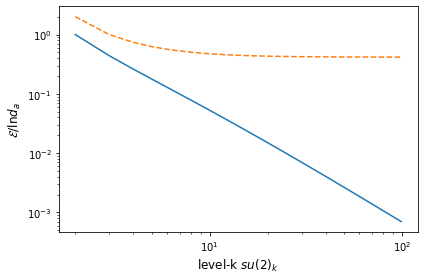

In [5]:
mI0= 2 -np.log2(3)
print(mI0,mI[-1]/np.log(da_k[-1]))

# plt.figure(figsize=(4,3))
ax1=plt.subplot()

plt.plot(klist,np.log(rT1)/np.log(da_k),'-',label=r'$su(2)_{%d}$' % (k))
plt.plot(klist,mI/np.log(da_k),'--',label=r'$su(2)_{%d}$' % (k))
kpts=np.linspace(min(klist),max(klist))
# plt.plot(kpts,kpts**(-1.85))

ax1.loglog()

plt.xlabel('level-k $su(2)_k$',fontsize=fsize+2)
plt.ylabel(r'${\cal E}/\ln d_a$',fontsize=fsize+2)
# plt.xticks(np.arange(0,1.1,0.5),fontsize=fsize)
plt.yticks(fontsize=fsize)
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
# plt.legend(fontsize=fsize-1)
plt.tight_layout()

# plt.savefig('su2k_spin_half.pdf')
plt.show()

In [275]:
# 2d phase diagram

k=4
q= np.exp(1j*2*pi/(k+2))
a=1
b=1
da=qdim(a,k)
db=qdim(b,k)

fmin=np.abs(a-b)
fmax=np.min([a+b, k-a-b])
flist=np.arange(fmin,fmax+1)
print(flist)

clist=[0,1,2]

plist=np.linspace(0,1,100) 
rT1=np.zeros((len(plist),len(plist))) 
x=[]
y=[]
z=[]
for i_1 in range(len(plist)):
    for i_2 in range(len(plist)):
        if 1-plist[i_1]-plist[i_2]>= 0:
            pf=[plist[i_1],plist[i_2],1-plist[i_1]-plist[i_2]]
#             rT1[i_1,i_2] = 0
            for c in clist:
                sf=0
                for i_f in range(len(flist)):
                    f= flist[i_f]
                    if fusion(a,f,a,c,b,b,k):
                        sf+= pf[i_f]*Rsym(f,a,b,q)*Fsym(a,f,a,c,b,b,q)
                        
                rT1[i_1,i_2] += qdim(c,k)/db* np.abs(sf)
            x.append(plist[i_1])
            y.append(plist[i_2])
            z.append(np.log(rT1[i_1,i_2])/np.log(da))

[0 1 2]


In [ ]:
# np.where(np.abs(rT1-1)<1e-6)
print(plist[79],plist[178],1-plist[79]-plist[178])
print(qdim(flist[0],k)/(da*db),qdim(flist[1],k)/(da*db),qdim(flist[2],k)/(da*db))

<ipython-input-24-4748ddc9f831>:2: RuntimeWarning: divide by zero encountered in log
  pos=plt.imshow(np.log(rT1)/np.log(da), cmap='Reds', vmin=0, vmax=1,


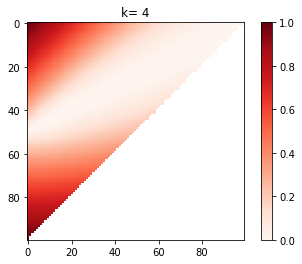

In [24]:
f1=plt.figure()
pos=plt.imshow(np.log(rT1)/np.log(da), cmap='Reds', vmin=0, vmax=1,
                             interpolation='none')
plt.title('k= %d' % (k))
f1.colorbar(pos)
plt.show()

<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-25-8a72d27bded1>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % 

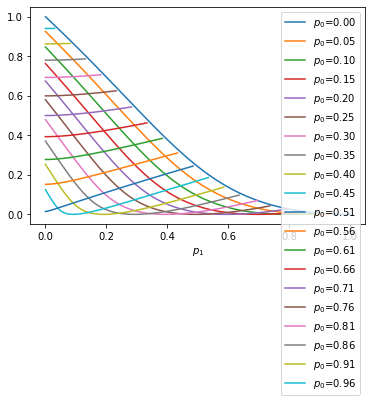

<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-25-8a72d27bded1>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.

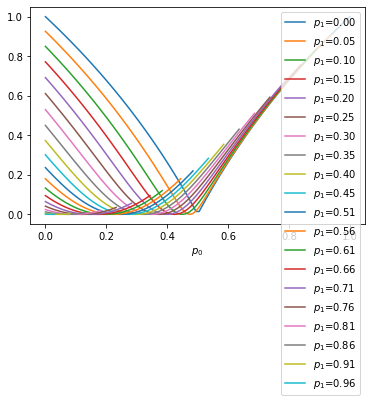

In [25]:
plt.figure()
for i_1 in np.arange(0,len(plist),5):
# for i_1 in [0,20,40]:
    plt.plot(plist,np.log(rT1[i_1,:])/np.log(da), label=r'$p_0$=%.2f' % (plist[i_1]))
plt.legend()
plt.xlabel('$p_1$')
plt.show()

for i_2 in np.arange(0,len(plist),5):
# for i_2 in [0,20, 40, 60]:
    plt.plot(plist,np.log(rT1[:,i_2])/np.log(da), label=r'$p_1$=%.2f' % (plist[i_2]))
plt.legend()
plt.xlabel('$p_0$')
plt.show()

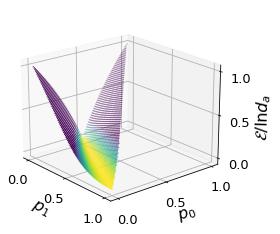

In [310]:
import matplotlib.tri as mtri

tri = mtri.Triangulation(x, y)

fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, x, z, c=z, s=1, cmap='viridis_r', linewidth=0.2,vmin=0.,vmax=0.2);
# ax.plot_trisurf(x, y, z, triangles=tri.triangles,
#                 cmap=plt.cm.Spectral,vmin=0,vmax=0.5)#, edgecolor='none');
# ax.view_init(90, -45)

fsize=16
ax.set_xticks(np.arange(0,1.1,0.5))
ax.set_yticks(np.arange(0,1.1,0.5)) 
ax.set_zticks(np.arange(0,1.1,0.5)) 
ax.set_xticklabels(np.arange(0,1.1,0.5),fontsize= fsize-3)
ax.set_yticklabels(np.arange(0,1.1,0.5),fontsize= fsize-3)
ax.set_zticklabels(np.arange(0,1.1,0.5),fontsize= fsize-3)

ax.set_ylabel(r"$p_0$",fontsize = fsize)
ax.set_xlabel(r'$p_1$',fontsize = fsize)
ax.set_zlabel(r'${\cal E}/\ln d_a$',fontsize = fsize);
# ax.xaxis.set_minor_locator(AutoMinorLocator(2))
# ax.yaxis.set_minor_locator(AutoMinorLocator(2))
# ax.zaxis.set_minor_locator(AutoMinorLocator(2))
# tmp_planes = ax.zaxis._PLANES
# ax.zaxis._PLANES = (tmp_planes[4], tmp_planes[0],
#                              tmp_planes[3], tmp_planes[1],
#                              tmp_planes[4], tmp_planes[5])
# ax.zaxis._PLANES = (tmp_planes[2], tmp_planes[3],
#                              tmp_planes[0], tmp_planes[1],
#                              tmp_planes[4], tmp_planes[5])

# ax.zaxis._PLANES = (tmp_planes[3], tmp_planes[2], 
#                          tmp_planes[1], tmp_planes[0], 
#                          tmp_planes[4], tmp_planes[5])
ax.view_init(20, -40)
# plt.savefig('su2_k%d_2d.pdf' % (k))
plt.show()

<ipython-input-54-3d76447f411b>:4: RuntimeWarning: divide by zero encountered in log
  Z= np.log(rT1)/np.log(da)


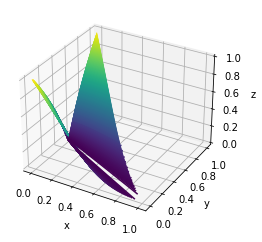

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
X,Y= np.meshgrid(plist,plist)
Z= np.log(rT1)/np.log(da)
ax.contour3D(X, Y, Z, 400)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
# ax.view_init(20, -120)
# ax.view_init(90, 160)


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# u = np.linspace(0, 1, 100)
# v = np.linspace(1, 0, 100)
u = plist[::-1]
v = plist

x = np.outer(np.ones_like(u), v)
y = np.outer(v, u)
# z = 1 - x - y
z = np.log(rT1)
# f = 0.8*x + 0.6*y + 0.9*z
f = z

# norm = Normalize (f.min(), f.max())
norm = Normalize (0, f.max())
m = plt.cm.ScalarMappable()
m.set_array([])
fcolors = m.to_rgba(f)

ax.view_init(azim=40,elev=40)
ax.plot_surface(x, y, z, rstride=2, cstride=2, facecolors=fcolors, shade=False, vmin=0, vmax=2)
ax.set_zlim(0, 1)

plt.show()

In [ ]:
print(plist[::-1])

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

X,Y= np.meshgrid(plist,plist)
# X = plist
# Y = plist
Z= np.log(rT1)/np.log(da)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')


surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.8, cmap=cm.ocean, vmin = 0, vmax = 1)
# cset = ax.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.ocean, vmin = 0, vmax = 2)
# cset = ax.contourf(X, Y, Z, zdir='x', offset=-5, cmap=cm.ocean)
# cset = ax.contourf(X, Y, Z, zdir='y', offset=5, cmap=cm.ocean)


fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)


ax.set_xlabel('X')
# ax.set_xlim(-5, 5)
ax.set_ylabel('Y')
# ax.set_ylim(-5, 5)
ax.set_zlabel('Z')
ax.set_zlim(0, 1)
# ax.set_zlim(np.min(Z), np.max(Z))
ax.set_title('3D surface with 2D contour plot projections')
ax.view_init(0, -20)

plt.show()

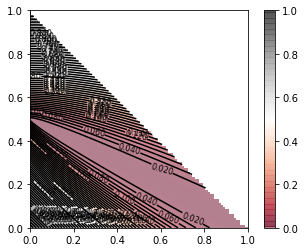

In [10]:
contours = plt.contour(X, Y, Z, 50, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 1, 0, 1], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();

<ipython-input-11-4748ddc9f831>:2: RuntimeWarning: divide by zero encountered in log
  pos=plt.imshow(np.log(rT1)/np.log(da), cmap='Reds', vmin=0, vmax=1,


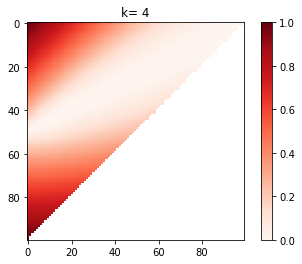

In [11]:
f1=plt.figure()
pos=plt.imshow(np.log(rT1)/np.log(da), cmap='Reds', vmin=0, vmax=1,
                             interpolation='none')
plt.title('k= %d' % (k))
f1.colorbar(pos)
plt.show()

In [ ]:
f1=plt.figure()
pos=plt.imshow(np.log(rT1)/np.log(da), cmap='Reds', vmin=0, vmax=1,
                             interpolation='none')
plt.title('k= %d' % (k))
f1.colorbar(pos)
plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Read data from a csv
fig = go.Figure(data=[go.Surface(z=np.log(rT1))])
fig.show()

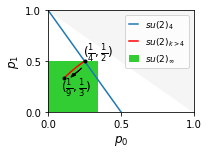

In [227]:
a=1
b=1

klist= np.arange(4,400)
p0=np.zeros(len(klist))
p1=np.zeros(len(klist))

fsize=10
plt.figure(figsize=(3.,2.25))
# ax = fig.add_subplot()

# plt.fill([0,1,0],[1,0,0],color='whitesmoke')
plt.fill([0,1,1],[1,1,0],color='whitesmoke')
# plt.fill([0,1/3,1/3,0],[0.5,0.5,0,0],color='whitesmoke')
# plt.plot([0,1/3,1/3],[0.5,0.5,0],'k',linewidth=0.5,label='$su(2)_\infty$')
plt.fill([0,1/3,1/3,0],[0.5,0.5,0,0],color='limegreen',label='$su(2)_\infty$')

for i_k in range(len(klist)):
    k=klist[i_k]
    da=qdim(a,k)
    db=qdim(b,k)
    p0[i_k]= 1/(da*db)
    p1[i_k]= 1/da

plist=np.linspace(0,1,100) 
plt.plot((1-plist)/2,plist,color='C0',label='$su(2)_4$')
plt.plot(p0,p1,'-',color='red',label='$su(2)_{k>4}$')
plt.xlim([0,1])
plt.ylim([0,1])

plt.plot(p0[0],p1[0],'o',markersize=3,color='k')
plt.plot(p0[-1],p1[-1],'o',markersize=3,color='k')#,label='$su(2)_{100}$')

plt.xlabel(r'$p_0$',fontsize=fsize+2)
plt.ylabel(r'$p_1$',fontsize=fsize+2)
plt.xticks([0,0.5,1],fontsize=fsize)
plt.yticks([0,0.5,1],fontsize=fsize)
# ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
plt.legend(fontsize=fsize-1,handlelength=1., loc='upper right')

t1 = r'$(\frac{1}{4},\frac{1}{2})$'
plt.annotate(t1, xy=(0.24, 0.55), fontsize=fsize+2, xycoords='axes fraction')
t2 = r'$(\frac{1}{9},\frac{1}{3})$'
plt.annotate(t2, xy=(0.09, 0.21), fontsize=fsize+2, xycoords='axes fraction')

x=0.23
dx=-0.05
y=0.43
dy=-0.06
plt.arrow(x,y,dx,dy,head_width=0.025,facecolor='black')

plt.tight_layout()
plt.savefig('su2k_spin_one.pdf')
plt.show()

In [ ]:
print(p0[0],p0[-1])

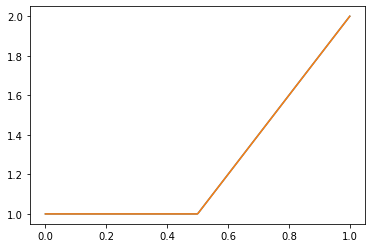

In [39]:
# regular spin-1/2 

def p_transpose_2(V,Na,Nb):
# partial transpose with respect to subsystem 2
# the basis of NaxNb density matrix is defined by Nb*(i-1)+j,
# i,j=1,2,3 spans the Hilbert space of subsystem 1 and 2 respectively
    U=np.zeros((Na*Nb,Na*Nb), dtype=np.complex128)
    for i_1 in range(Na):
        for i_2 in range(Na):
#             print(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)].shape)
            U[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)]=np.transpose(V[Nb*i_1:Nb*(i_1+1),Nb*i_2:Nb*(i_2+1)])

    return U

s=np.array([0,1,-1,0])/sqrt(2)
t0=np.array([0,1,1,0])/sqrt(2)
tp=np.array([1,0,0,0])
tn=np.array([0,0,0,1])

plist= np.linspace(0,1,400)
# plist=[0]
neg= np.zeros(len(plist))
for i_p in range(len(plist)):
    rho=plist[i_p]* np.dot(np.matrix(s).H,np.matrix(s))\
        +(1-plist[i_p])* np.dot(np.matrix(t0).H,np.matrix(t0))/3\
        +(1-plist[i_p])* np.dot(np.matrix(tp).H,np.matrix(tp))/3\
        +(1-plist[i_p])* np.dot(np.matrix(tn).H,np.matrix(tn))/3
#     rho=plist[i_p]* np.dot(np.matrix(s).H,np.matrix(s))\
#         +(1-plist[i_p])* np.dot(np.matrix(t0+tp+tn).H,np.matrix(t0+tp+tn))/3
    rT=p_transpose_2(rho,2,2)
    neg[i_p]=np.sum(np.abs(np.linalg.eigvalsh(rT)))
    
# print(rho,rT)
# print(np.linalg.eigvalsh(rT),neg)

plt.figure()
plt.plot(plist,neg)
plt.plot(plist,1/2+plist+np.abs(plist-1/2))
plt.show()

In [40]:
# two spin-1's

v1=np.array([0,0,1]) #-1
v2=np.array([0,1,0]) #0
v3=np.array([1,0,0]) #+1

J2vec=np.zeros((9,5))
J2vec[:,0]=np.kron(v3,v3) # J=2, m=2
J2vec[:,1]=(np.kron(v3,v2)+np.kron(v2,v3))/sqrt(2) # J=2, m=1
J2vec[:,2]=np.kron(v3,v1)/sqrt(6)+np.kron(v2,v2)*sqrt(2/3)+ np.kron(v1,v3)/sqrt(6) #J=2, m=0
J2vec[:,3]=(np.kron(v1,v2)+np.kron(v2,v1))/sqrt(2) # J=2, m=-1
J2vec[:,4]=np.kron(v1,v1) #J=2, m=-2

J1vec=np.zeros((9,3))
J1vec[:,0]=(np.kron(v3,v2)-np.kron(v2,v3))/sqrt(2) # J=1, m=1
J1vec[:,1]=(np.kron(v3,v1)- np.kron(v1,v3))/sqrt(2) #J=1, m=0
J1vec[:,2]=(np.kron(v1,v2)-np.kron(v2,v1))/sqrt(2) # J=1, m=-1

J0vec=np.zeros((9,1))
J0vec[:,0]=np.kron(v3,v1)/sqrt(3)-np.kron(v2,v2)/sqrt(3)+ np.kron(v1,v3)/sqrt(3) #J=0, m=0


plist=np.linspace(0,1,100)
# plist=np.array([np.random.rand(1)])
neg2d=np.zeros((len(plist),len(plist)))

for i_1 in range(len(plist)):
    for i_2 in range(len(plist)):
        if 1-plist[i_1]-plist[i_2]>= 0:
            rho=plist[i_1]* np.dot(np.matrix(J0vec),np.matrix(J0vec).H)\
                +plist[i_2]* np.dot(np.matrix(J1vec),np.matrix(J1vec).H)/3\
                +(1-plist[i_1]-plist[i_2])* np.dot(np.matrix(J2vec),np.matrix(J2vec).H)/5
            rT=p_transpose_2(rho,3,3)
            neg2d[i_1,i_2]=np.sum(np.abs(np.linalg.eigvalsh(rT)))


In [ ]:
f1=plt.figure()
pos=plt.imshow(np.log(neg2d)/np.log(3), cmap='Reds', vmin=0, vmax=1,
                             interpolation='none')
f1.colorbar(pos)
plt.show()

<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
<ipython-input-41-7db00f50d372>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.

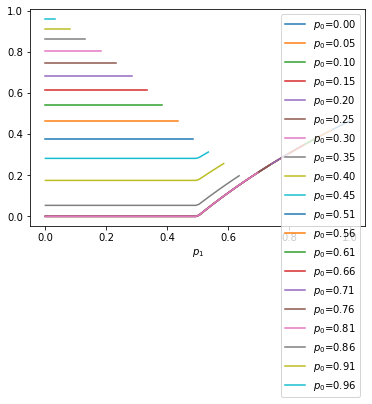

<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
<ipython-input-41-7db00f50d372>:11: RuntimeWarning: divide by zero encountered in log
  plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p

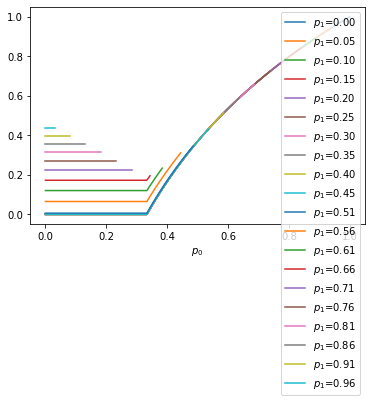

In [41]:
plt.figure()
for i_1 in np.arange(0,len(plist),5):
# for i_1 in [0,20,40]:
    plt.plot(plist,np.log(neg2d[i_1,:])/np.log(3), label=r'$p_0$=%.2f' % (plist[i_1]))
plt.legend()
plt.xlabel('$p_1$')
plt.show()

for i_2 in np.arange(0,len(plist),5):
# for i_2 in [0,51]:
    plt.plot(plist,np.log(neg2d[:,i_2])/np.log(3), label=r'$p_1$=%.2f' % (plist[i_2]))
plt.legend()
plt.xlabel('$p_0$')
plt.show()